### Data Mining and Machine Learning
### Classification using Support Vector Machine
#### Edgar Acuna 
#### April 2019

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. SVM applied to the prediction of  final grade in a class bases on examens E1 and E2

In [2]:
#df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [3]:
#Normalizibg the predictor matrix
y=df['Nota']
X=df.iloc[:,0:2]
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X1)
X1= scaler.transform(X1)

In [4]:
#print y1

In [5]:
#print X1

### Applying a linear SVM classifier and calculating the percentage of accuracy

In [6]:
#Applying a linear SVM classifier and calculating the percentage of accuracy
lin_clf = svm.LinearSVC()
lin_clf.fit(X1, y) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
#lin_clf.support_vectors_

In [8]:
#lin_clf.n_support_

In [9]:
#The confusion matrix
pred=lin_clf.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [38]:
#Calculating the number of errors
error=(y!=pred).sum()
print ("This is the number  of errors=", error)

ValueError: Lengths must match to compare

In [11]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



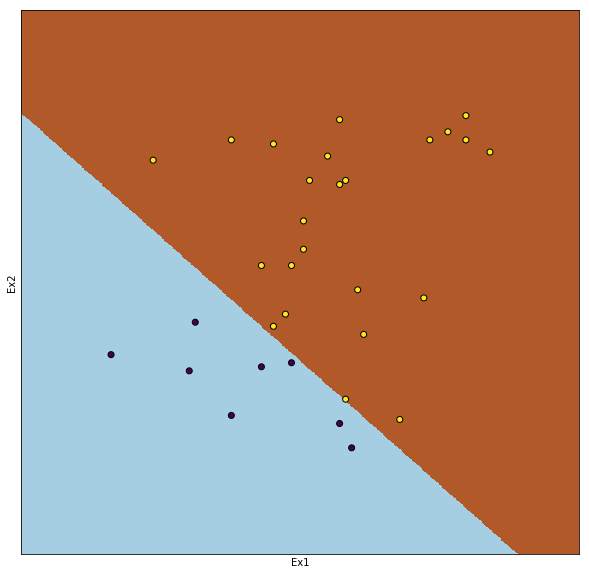

In [12]:
#Visualizing the decision Boundary
from matplotlib.colors import ListedColormap
#creando una columna "pass" numerica para representar las clases
#lb_make = LabelEncoder()
#df["pass"] = lb_make.fit_transform(df["Nota"])
#y2=df['pass']
#y1=y2.as_matrix()
#X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)
lin_clf = svm.LinearSVC()
lin_clf.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.01)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.01)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=lin_clf.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Applying a nonlinear SVM to the same dataset

In [13]:
clf = svm.SVC()
clf.fit(X1, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
clf.support_vectors_

array([[-1.37429956, -0.56638465],
       [-2.31141707, -0.87228016],
       [-0.30330812, -0.94875403],
       [ 0.2321876 , -1.52230811],
       [-0.63799295, -0.98699097],
       [-0.97267777, -1.44583423],
       [ 0.36606153, -1.75172974],
       [ 1.63786386,  1.38369921],
       [ 1.90561172,  1.03956676],
       [ 0.2321876 ,  1.34546227],
       [-1.84285831,  0.96309288],
       [-0.63799295, -0.03106751],
       [ 0.29912456, -1.29288648],
       [ 0.90155725, -1.48407117],
       [-0.50411902, -0.60462159],
       [-0.37024509, -0.48991077],
       [ 0.49993546, -0.68109546]])

In [15]:
clf.n_support_

array([ 7, 10])

In [16]:
#Calculando las predicciones
pred=clf.predict(X1)
print(pred)
#print(confusion_matrix(y,pred))

['p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p'
 'p' 'p' 'p' 'p' 'p' 'p' 'f' 'f' 'p' 'f' 'f' 'f' 'f' 'f']


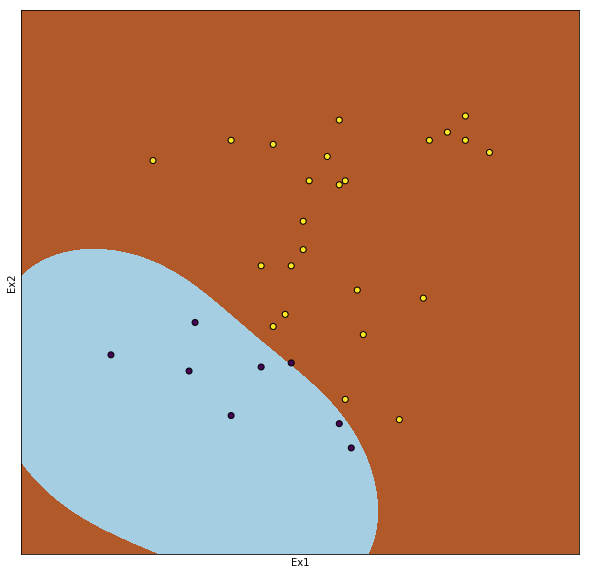

In [17]:
#Visualizing the decision Boundary
from matplotlib.colors import ListedColormap
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X1)
StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)
clf = svm.SVC()
clf.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.001)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.001)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=clf.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### Example 2. Nonlinear  SVM applied to Diabetes

In [18]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [19]:
y=data['class']
X=data.iloc[:,0:8]
lb_make = LabelEncoder()
data["class"] = lb_make.fit_transform(data["class"])
y2=data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.as_matrix()
X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
clf=svm.SVC()
clf.fit(X, y2) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
clf.support_vectors_

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 2.81e+01, 1.67e-01, 2.10e+01],
       [5.00e+00, 1.16e+02, 7.40e+01, ..., 2.56e+01, 2.01e-01, 3.00e+01],
       ...,
       [6.00e+00, 1.90e+02, 9.20e+01, ..., 3.55e+01, 2.78e-01, 6.60e+01],
       [9.00e+00, 1.70e+02, 7.40e+01, ..., 4.40e+01, 4.03e-01, 4.30e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01]])

In [22]:
clf.n_support_

array([500, 268])

#### Accuracy using resubstitution

In [23]:
#Accuracy using resubstitution
clf.score(X,y2)

1.0

#### Accuracy using cross validation

In [24]:
#Accuracy using cross validation
#y1=y.as_matrix()
X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)
clf=svm.SVC()
clf.fit(X1, y2) 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X1, y2, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())    

The accuracy estimated by CV is: 0.7616883116883117


In [25]:
#accuracy using train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf=svm.SVC()
clf.fit(X_train, y_train) 
pred=clf.predict(X_test)

In [26]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       125
           1       0.72      0.57      0.63        67

   micro avg       0.77      0.77      0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



### Example 3. Linear SVM applied to Landsat 

In [27]:
#Loading the Landsat dataset
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
#Accuracy estimation using the "holdout" method 
X_train, X_test, y_train, y_test = train_test_split(X, y)
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [29]:
pred=lin_clf.predict(X_test)
print ((pred==y_test).mean())
print(confusion_matrix(y_test, pred))

0.7177637511271415
[[268   0   4   0   4   0]
 [  3  63   0   0  45   0]
 [  1   0 175   0  31  27]
 [  0   0  46   0  25  40]
 [  1   0   0   0 103  10]
 [  0   0  29   0  47 187]]


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       276
           2       1.00      0.57      0.72       111
           3       0.69      0.75      0.72       234
           4       0.00      0.00      0.00       111
           5       0.40      0.90      0.56       114
           6       0.71      0.71      0.71       263

   micro avg       0.72      0.72      0.72      1109
   macro avg       0.63      0.65      0.61      1109
weighted avg       0.70      0.72      0.69      1109



### V. Linear SVM applied to Shuttle

In [31]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_table(url, header=None,delim_whitespace=True)

In [32]:
y=data.iloc[:,9]
X=data.iloc[:,0:9]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#Accuracy estimacion using the  "holdout" method 
X_train, X_test, y_train, y_test = train_test_split(X, y)
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [34]:
pred=lin_clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[8416    0  102    2    0    0    1]
 [   6    7    0    3    0    0    0]
 [  12    0   23    0    0    0    0]
 [ 568   35 1087    0    0    0    1]
 [   1    0    0    0  607    0    0]
 [   1    1    0    0    1    0    0]
 [   0    0    1    0    0    0    0]]


In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96      8521
           2       0.16      0.44      0.24        16
           3       0.02      0.66      0.04        35
           4       0.00      0.00      0.00      1691
           5       1.00      1.00      1.00       608
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

   micro avg       0.83      0.83      0.83     10875
   macro avg       0.30      0.44      0.32     10875
weighted avg       0.79      0.83      0.81     10875



In [36]:
clf1 = svm.SVC(decision_function_shape='ovo')
clf1.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
pred=lin_clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[8416    0  102    2    0    0    1]
 [   6    7    0    3    0    0    0]
 [  12    0   23    0    0    0    0]
 [ 568   35 1087    0    0    0    1]
 [   1    0    0    0  607    0    0]
 [   1    1    0    0    1    0    0]
 [   0    0    1    0    0    0    0]]
